# RECURRENT NEURAL NETWORK

NAME: TIMILEYIN SAMUEL AKINTILO

STUDENT ID: C00302909

#### INTRODUCTION

This notebook showcases the implemention of the recurrent neural network using the Keras library. The notebook was developed from scratch to demostrate a significant practical and theoretical understanding of the underlying deep learning algorithm.

#### LOG OF CHANGES

This log embodies all the changes and implementations made in the notebook and the impact of those changes on the result of the analysis. The log is structured to follows the Cross Industry Standard Process for Data Mining (CRISP-DM) model, and the changes were logged under each of the six phases as follows:

**1. Business understanding**

This project is a sentiment analysis task which aims to classify reviews. This analysis is focused on building a robust deep learning algorithm that will classify reviews into positive and negative sentiments. The model will provide valuable assistance to businesses in understanding customer feedback and sentiment, allowing them to make data-driven decisions to improve their products, services, and overall customer experience.

**2. Data Understanding**

This  analysis makes use of twitter sentiments downloaded from Kaggle (https://www.kaggle.com/datasets/dineshpiyasamara/sentiment-analysis-dataset). The dataset contains contains 7920 tweets as well as the labelled sentiments (label). A postive sentiment is represented by label 0, while a negative sentiment is represented by a label 1.

**3. Data Preparation**

In the data preprocessing stage, the tweets underwent a number of preprocessing steps as listed below:

a) Removal of special characters

b) Case Normalization

c) Text tokenization

d) Removal of stop words

e) Conversion of text to sequence

f) Sequence padding

**4. Modelling**

**Change:** Various architectures were created and use to train the model to obtain a better accuracy.

**Result:** The first architecture has  4 RNN layers and 1 dense layer with dropouts and Adamax optimizer . The second architecture has the same number of layers without dropouts and with Adam optimizer. The two architecture attained an accuracy of 0.72.


**4. Evaluation:**

The performance of the model was evaluated using accuracy as the metric.

**5. Deployment:**

The best model was saved as a keras file but was not deployed due to time constraint.


First things first, we will import the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re 
import seaborn as sns 
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import tensorflow as tf 
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, Embedding,  BatchNormalization 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.utils import pad_sequences 

Now, we will load the dataset

In [2]:
# read in the data
df = pd.read_csv('Sentiment_analysis.csv')

In [3]:
# check the first few rows
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


Let us check the shape of the dataset

In [4]:
# check the shape of the data
df.shape

(7920, 3)

We have 7920 reviews in the dataset.

In [5]:
# check for missing values
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

There are no missing values in the data.

We will proceed by checking the distribution of the target variable.


In [6]:
# check the distribution of the target variable
df['label'].value_counts()

label
0    5894
1    2026
Name: count, dtype: int64

We have 7920 reviews in the dataset and no missing values. The target variable is Liked and it is binary. The dataset is balanced with 5894 positive reviews and 2026 negative reviews.

#### Data Preprocessing

We will now preprocess the text data by removing stopwords, special characters, and converting the text to lowercase.

In [7]:
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


##### a. Remove all the special characters

In [8]:
# removing html brackets and other square brackets from the string using regex 
regex = re.compile('<.*?>|\.\.\.')
df['tweet'] = df['tweet'].apply(lambda x: re.sub(regex, '', x))

# removing special characters like @, #, $, etc 
pattern= re.compile('[^a-zA-Z0-9\s()]')
df['tweet'] = df['tweet'].apply(lambda x: re.sub(pattern, '', x))

# removing special characters ) and (
pattern2 = re.compile('[()]')
df['tweet'] = df['tweet'].apply(lambda x: re.sub(pattern2, '', x))

# removing numbers 
pattern3 = re.compile('\d+') 
df['tweet'] = df['tweet'].apply(lambda x: re.sub(pattern3, '', x)) 


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\d'
C:\Users\akint\AppData\Local\Temp\ipykernel_1004\970011955.py:2: SyntaxWarning: invalid escape sequence '\.'
  regex = re.compile('<.*?>|\.\.\.')
C:\Users\akint\AppData\Local\Temp\ipykernel_1004\970011955.py:6: SyntaxWarning: invalid escape sequence '\s'
  pattern= re.compile('[^a-zA-Z0-9\s()]')
C:\Users\akint\AppData\Local\Temp\ipykernel_1004\970011955.py:14: SyntaxWarning: invalid escape sequence '\d'
  pattern3 = re.compile('\d+')


In [9]:
df.head(10)

,id,label,tweet
0,1,0,fingerprint Pregnancy Test httpsgooglhMfQV and...
1,2,0,Finally a transparant silicon case Thanks to ...
2,3,0,We love this Would you go talk makememories un...
3,4,0,Im wired I know Im George I was made that way ...
4,5,1,What amazing service Apple wont even talk to m...
5,6,1,iPhone software update fucked up my phone big ...
6,7,0,Happy for us instapic instadaily us sony xper...
7,8,0,New Type C charger cable UK httpwwwebaycoukitm...
8,9,0,Bout to go shopping again listening to music i...
9,10,0,Photo fun selfie pool water sony camera picoft...


Great. Now that we proceed with case regularisation and tokenisation of the text data.

##### b. Case regularization and tokenization


To remove stopwords, we first need to download the stopwords from the nltk library.

In [10]:
# downloading stopwords from nltk library 
nltk.download('stopwords') 
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akint\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We will develop a function to perform case normalization, tokenization, and stop words removal.

In [11]:
def preprocess_text(text):
    """
    Function to preprocess text data
    """
    # Convert text to lowercase
    text = text.str.lower()

    # Tokenization of words
    text = text.apply(word_tokenize)

    # Define stopwords
    stop_words = set(stopwords.words('english'))

    # Stop words removal
    text = text.apply(lambda x: [word for word in x if word not in stop_words])

    # Join tokens back into a single string
    text = text.apply(lambda x: ' '.join(x))

    return text

# Preprocess text data
df['tweet'] = preprocess_text(df['tweet'])

In [12]:
df.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test httpsgooglhmfqv and...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,im wired know im george made way iphone cute d...
4,5,1,amazing service apple wont even talk question ...


Now, the data is preprocessed and ready for modeling. We will split the data into features and label.

In [13]:
# split the data into features and target
X = df['tweet']
y = df['label']


We will now split the data into training and testing sets. We will use 80% of the data for training and 20% for testing.

In [14]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# check the shape of the training and testing sets
X_train.shape, X_test.shape

((6336,), (1584,))

Next, we will generate a sequence of tokens from the text data using the Tokenizer class from the Keras library.

In [16]:
# Tokenize words
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(X_train)

# Generate text sequences
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


Now, we will pad the sequences to ensure that all sequences have the same length.

In [17]:
# Pad sequences to ensure uniform length
max_sequence_length = 100 
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

X_train.shape, X_test.shape

((6336, 100), (1584, 100))

In [18]:
# shape of the data
y_train.shape, y_test.shape

((6336,), (1584,))

Next, we will reshape the features to be 3-dimensional as required by the RNN model.

In [19]:
# Adjust the shape of the data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train.shape, X_test.shape)

(6336, 100, 1) (1584, 100, 1)


Now we will create a simple RNN model using the Keras Sequential API.

In [20]:
# Build the RNN model

# Initialize the RNN
rnn = Sequential()

# Add the first RNN layer
rnn.add(SimpleRNN(units=50, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], 1)))

# Add the second RNN layer
rnn.add(SimpleRNN(units=50, activation="tanh", return_sequences=True))

# Add the third RNN layer
rnn.add(SimpleRNN(units=50, activation="tanh", return_sequences=True))

# Add the fourth RNN layer
rnn.add(SimpleRNN(units=50))

# Add the output layer
rnn.add(Dense(units=1))


c:\Users\akint\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
# Compiling model 
from tensorflow.keras.optimizers import Adam

# Create Adam optimizer with your learning rate
optimizer = Adam(learning_rate=0.001)

rnn.compile( 
    loss="binary_crossentropy", 
    optimizer='adamax', 
    metrics=['accuracy'] 
) 

In [51]:
# Training model
model = rnn.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5


40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - accuracy: 0.7579 - loss: 0.5685 - val_accuracy: 0.7587 - val_loss: 0.5195
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.7643 - loss: 0.4829 - val_accuracy: 0.7563 - val_loss: 0.5192
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.7608 - loss: 0.4911 - val_accuracy: 0.7547 - val_loss: 0.5101
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.7573 - loss: 0.4869 - val_accuracy: 0.7532 - val_loss: 0.5211
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.7683 - loss: 0.4815 - val_accuracy: 0.7532 - val_loss: 0.5088


In [52]:
# evaluate the model on the test set
loss, accuracy = rnn.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7264 - loss: 0.5251
Accuracy: 0.7279040217399597


Now we will plot the training and validation loss and accuracy to see how the model performed during training.

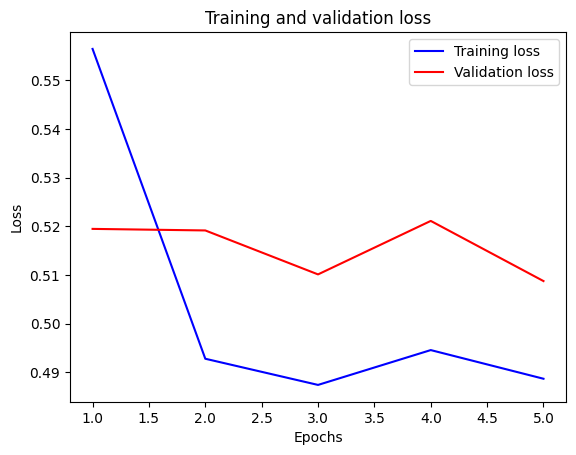

In [53]:
# Extracting training loss and validation loss
train_loss = model.history['loss']
val_loss = model.history['val_loss']

# Plotting the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Now, we will build another architecture with dropouts

In [27]:

# Build the RNN model

# Initialize the RNN
rnn = Sequential()

# Add the first RNN layer and some Dropout regularisation
rnn.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],1)))
rnn.add(Dropout(0.2))

# Add the second RNN layer and some Dropout regularisation
rnn.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
rnn.add(Dropout(0.2))

# Add the third RNN layer and some Dropout regularisation
rnn.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
rnn.add(Dropout(0.2))

# Add the fourth RNN layer and some Dropout regularisation
rnn.add(SimpleRNN(units = 50))
rnn.add(Dropout(0.2))

# Add the output layer
rnn.add(Dense(units = 1))

We will change the optimizer to Adam

In [28]:
# Compiling model 
rnn.compile( 
    loss="mean_squared_error", 
    optimizer='adam', 
    metrics=['accuracy'] 
) 

In [29]:
# Training model
model = rnn.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10


50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 148ms/step - accuracy: 0.5956 - loss: 0.5883 - val_accuracy: 0.7197 - val_loss: 0.2194
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.6372 - loss: 0.3658 - val_accuracy: 0.7273 - val_loss: 0.2549
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - accuracy: 0.6513 - loss: 0.3054 - val_accuracy: 0.7266 - val_loss: 0.2040
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.6629 - loss: 0.2691 - val_accuracy: 0.7304 - val_loss: 0.1892
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.6708 - loss: 0.2564 - val_accuracy: 0.6900 - val_loss: 0.2056
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - accuracy: 0.6822 - loss: 0.2336 - val_accuracy: 0.7273 - val_loss: 0.1902
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.6977 - loss: 0.2234 - val_accuracy: 0.7273 - val_loss: 0.1884
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.7035 - loss: 0.2135 - val_accuracy: 0.7273 - 

Now, we are able attain a validation accuracy of 0.72. This is a good result for a simple RNN model. We can further improve the model by using more complex models like LSTM or GRU.

Now we will plot the training and validation loss and accuracy to see how the model performed during training.

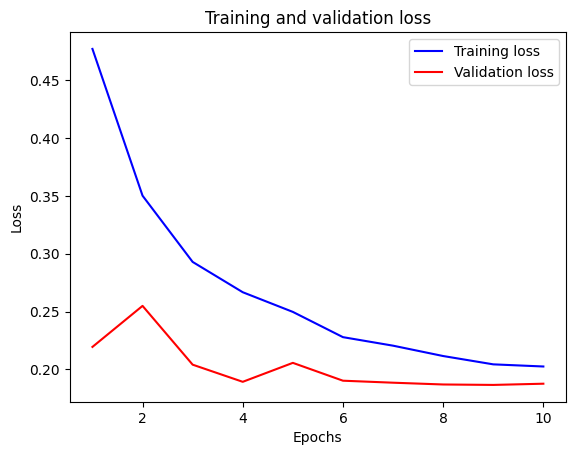

In [30]:
# Extracting training loss and validation loss
train_loss = model.history['loss']
val_loss = model.history['val_loss']

# Plotting the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Now, we will save the model as a keras file

In [33]:
# Save the model
rnn.save('twitter_sa.keras')

BIBLIOGRAPHY

https://www.kaggle.com/datasets/dineshpiyasamara/sentiment-analysis-dataset